In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import stan  # pystan
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("./data/data.xlsx", index_col=[0])

In [4]:
df.head()

,0
0,3.896195
1,5.865766
2,5.860887
3,4.660614
4,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <BarContainer object of 10 artists>)

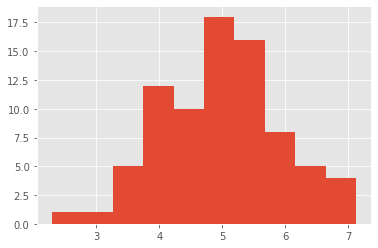

In [5]:
plt.hist(df[0])

## Stanモデルの記述

データブロック　→　パラメータブロック　→　統計モデルブロック

In [6]:
stan_model = """
data {
  int N;
  real Y[N];
}

parameters {
  real mu;
  real<lower=0> sigma;
}

model {
  for (i in 1:N){
    Y[i] ~ normal(mu, sigma);
  }
}
"""

In [7]:
stan_data = {"N":df.shape[0], "Y":df[0].values}  # わたすデータを辞書型で定義

In [8]:
# sm = pystan.StanModel(model_code=stan_model)  # コンパイル
# fit = sm.sampling(data=stan_data, iter=2000, chains = 3, warmup= 500, seed=123)  # サンプリング（条件指定）　イテレーションは小さく初めて
# fit

In [9]:
import nest_asyncio
nest_asyncio.apply()

In [10]:
posterior = stan.build(stan_model, data=stan_data, random_seed=123)
fit = posterior.sample(num_chains=3, num_samples=1500, num_warmup=500, save_warmup=0)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_bvj7s62e/model_hlkbqx4n.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Sampling:   0%
Sampling:  33% (2000/6000)
Sampling:  67% (4000/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  

In [11]:
df_fit = fit.to_frame()
df_fit.describe().T

,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
lp__,4500.0,-37.100478,1.005036,-44.874698,-37.495208,-36.799148,-36.376232,-36.071750
accept_stat__,4500.0,0.906014,0.117396,0.062375,0.864465,0.948896,0.994309,1.000000
stepsize__,4500.0,0.897276,0.052687,0.824399,0.824399,0.920313,0.947116,0.947116
treedepth__,4500.0,1.828222,0.466293,1.000000,2.000000,2.000000,2.000000,3.000000
n_leapfrog__,4500.0,3.462667,1.686783,1.000000,3.000000,3.000000,3.000000,7.000000
divergent__,4500.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
energy__,4500.0,38.115102,1.413801,36.088208,37.076813,37.771574,38.862970,47.430129
mu,4500.0,4.975925,0.109952,4.543091,4.901497,4.974643,5.048693,5.371563
sigma,4500.0,0.972778,0.079806,0.725452,0.916368,0.967121,1.025179,1.313434


In [12]:
fit.keys

<bound method Mapping.keys of <stan.Fit>
Parameters:
    mu: ()
    sigma: ()
Draws: 4500>

In [13]:
# fig = fit.plot()

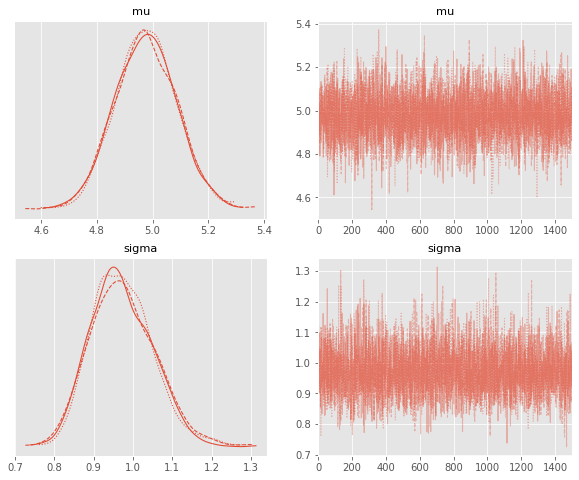

In [14]:
import arviz
arviz.plot_trace(fit, figsize=(10,8));

In [15]:
fit['mu'].mean(), fit['sigma'].mean()

(4.975924547478164, 0.9727780750703047)